# <font color='blue'>KNN Hands-On</font>
# <font color='blue'>Capítulo 1</font>


In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da Linguagem Python usada neste Jupyter Notebook: 3.9.12


In [1]:
import sklearn
print(sklearn.__version__)

1.4.2


# Exemplo com dataset Iris

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Carregar conjunto de dados de exemplo (Iris dataset)
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Classes

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN:", accuracy)

Acurácia do KNN: 1.0


# Nearest Neighbors

## Nearest Neighbors Não Supervisionados

### BallTree

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Carregar conjunto de dados de exemplo (Íris dataset)
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Classes

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar um classificador KNN com BallTree e k=3
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree')

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN com BallTree:", accuracy)


Acurácia do KNN com BallTree: 1.0


### Recomendação de filmes com BallTree

In [4]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados de avaliações de filmes
movies = pd.read_csv('dataset/movies.csv')
ratings = pd.read_csv('dataset/ratings.csv')

# Calcular média de avaliação por filme
movie_ratings = ratings.groupby('movieId').agg({'rating': 'mean', 'userId': 'count'})
movie_ratings.rename(columns={'rating': 'avg_rating', 'userId': 'num_ratings'}, inplace=True)

# Juntar informações dos filmes com média de avaliação
movies = pd.merge(movies, movie_ratings, on='movieId')

# Selecionar apenas algumas características relevantes para o exemplo
features = ['avg_rating', 'num_ratings']

# Padronizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(movies[features])

# Criar e treinar o modelo KNN com BallTree
knn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
knn.fit(X)

# Função para encontrar filmes semelhantes
def find_similar_movies(movie_index):
    distances, indices = knn.kneighbors([X[movie_index]])
    similar_movies = [(movies.iloc[idx]['title'], distances.squeeze()[i]) for i, idx in enumerate(indices.squeeze())]
    return similar_movies

# Exemplo: Encontrar filmes semelhantes ao filme com índice 0
similar_movies = find_similar_movies(0)
print("Filmes semelhantes ao filme:", movies.iloc[0]['title'])
for movie, distance in similar_movies[1:]:  # Exclui o filme em si da lista
    print(f"{movie} (Distância: {distance})")


Filmes semelhantes ao filme: Toy Story (1995)
Star Wars: Episode V - The Empire Strikes Back (1980) (Distância: 0.38299165451262984)
Terminator 2: Judgment Day (1991) (Distância: 0.4058879034472924)
Schindler's List (1993) (Distância: 0.4147618738457047)
Fight Club (1999) (Distância: 0.42626982607196917)


### KNN KDTree

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Gerar dados de exemplo
np.random.seed(0)
X = np.random.rand(1000, 3)  # Características: idade, gênero, valor gasto
y = np.random.choice([0, 1], size=1000)  # Classe: 0 (não comprou), 1 (comprou)

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um classificador KNN com KDTree e k=3
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN com KDTree:", accuracy)


Acurácia do KNN com KDTree: 0.56


### KNN Brute Force

In [6]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Classes

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um classificador KNN com força bruta e k=3
knn = KNeighborsClassifier(n_neighbors=3, algorithm='brute')

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN com busca em força bruta:", accuracy)


Acurácia do KNN com busca em força bruta: 1.0


## Classificação com KNN

### KNeighborsClassifier

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Classes

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados (importante para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um classificador KNN com k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Treinar o classificador com o conjunto de treinamento
knn.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do KNN:", accuracy)

Acurácia do KNN: 1.0


Vamos a outro exemplo. Queremos usar um classificador de k vizinhos mais próximos considerando 
uma vizinhança de 11 pontos de dados. 

Como nosso modelo de k-vizinhos mais próximos usa a distância euclidiana para encontrar os vizinhos mais próximos,
é importante dimensionar os dados com antecedência. 

Assim, usamos um Pipeline para encadear um escalonador antes de usar nosso classificador.

Neste exemplo, usamos o conjunto de dados iris.
Dividimos os dados em um conjunto de dados de treinamento e teste.

In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

Agora, ajustamos dois classificadores com valores diferentes de pesos de parâmetro. 

Traçamos o limite de decisão de cada classificador, bem como o conjunto de dados original para observar a diferença.

In [9]:
# Caso dê erro ao executar o pacote DecisionBoundaryDisplay,
# instale o scikit-learn a partir da versão 1.1.0

#!pip install scikit-learn

In [15]:
import sklearn
print(sklearn.__version__)

1.4.2


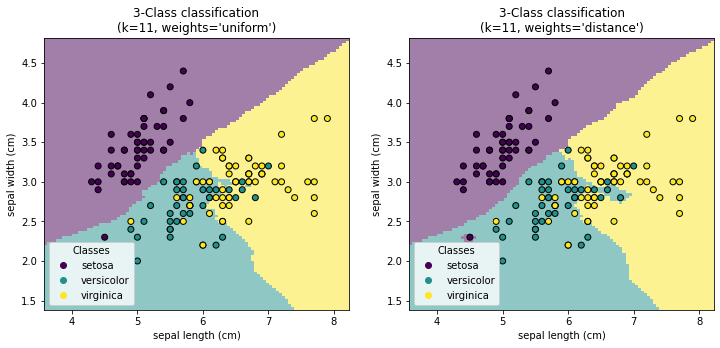

In [16]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

### RadiusNeighborsClassifier

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Classes

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um classificador RadiusNeighbors com raio=0.5
radius = 1.0
rnc = RadiusNeighborsClassifier(radius=radius)

# Treinar o classificador com o conjunto de treinamento
rnc.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = rnc.predict(X_test_scaled)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do RadiusNeighborsClassifier:", accuracy)

Acurácia do RadiusNeighborsClassifier: 0.9666666666666667


## Regressão com KNN

### KNeighborsRegressor

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados California Housing
california_housing = fetch_california_housing()
X = california_housing.data  # Características
y = california_housing.target  # Variável alvo (preços das casas)

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um regressor KNN com k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Treinar o regressor com o conjunto de treinamento
knn_regressor.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn_regressor.predict(X_test_scaled)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático (MSE):", mse)

Erro médio quadrático (MSE): 0.4324216146043236


### RadiusNeighborsRegressor

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Carregar conjunto de dados Iris
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Variável alvo (espécies)

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar um regressor RadiusNeighbors com raio=0.5
radius_regressor = RadiusNeighborsRegressor(radius=0.5)

# Treinar o regressor com o conjunto de treinamento
radius_regressor.fit(X_train_scaled, y_train)

# Fazer previsões no conjunto de teste
y_pred = radius_regressor.predict(X_test_scaled)

# Avaliar o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrático (MSE) do RadiusNeighborsRegressor:", mse)



Erro médio quadrático (MSE) do RadiusNeighborsRegressor: 5.671372782015641e+36


## Fim